In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from pylab import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
credit_data = pd.read_csv('german_credit_card.csv')

In [3]:
credit_data.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [4]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Creditability                        1000 non-null int64
Account Balance                      1000 non-null int64
Duration of Credit (month)           1000 non-null int64
Payment Status of Previous Credit    1000 non-null int64
Purpose                              1000 non-null int64
Credit Amount                        1000 non-null int64
Value Savings/Stocks                 1000 non-null int64
Length of current employment         1000 non-null int64
Instalment per cent                  1000 non-null int64
Sex & Marital Status                 1000 non-null int64
Guarantors                           1000 non-null int64
Duration in Current address          1000 non-null int64
Most valuable available asset        1000 non-null int64
Age (years)                          1000 non-null int64
Concurrent Credits                   1000 non-null int64
Type of apartment                    10

In [5]:
from sklearn.preprocessing import StandardScaler
#this is incase you want to create a standardized dataframe for machine learning
features = ['Creditability','Account Balance','Duration of Credit (month)','Payment Status of Previous Credit','Purpose',
            'Credit Amount','Value Savings/Stocks','Length of current employment','Instalment per cent',
            'Sex & Marital Status','Guarantors','Duration in Current address','Most valuable available asset'
            'Age (years)','Concurrent Credits','Type of apartment','No of Credits at this Bank','Occupation'
            'No of dependents','Occupation','No of dependents','Telephone','Foreign Worker']
# Separating out the features
x = credit_data.iloc[: , 1:21].values
# Separating out the target
y = credit_data.loc[: , ['Creditability']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
x

array([[-1.25456565, -0.24085723,  1.34401408, ..., -0.42828957,
        -0.82331789, -0.19601428],
       [-1.25456565, -0.9875727 ,  1.34401408, ...,  2.33486893,
        -0.82331789, -0.19601428],
       [-0.45902624, -0.73866754, -0.50342796, ..., -0.42828957,
        -0.82331789, -0.19601428],
       ...,
       [ 1.13205258,  0.00804793,  1.34401408, ..., -0.42828957,
         1.21459768, -0.19601428],
       [-0.45902624, -0.73866754, -0.50342796, ..., -0.42828957,
         1.21459768, -0.19601428],
       [-1.25456565,  0.75476341, -0.50342796, ..., -0.42828957,
        -0.82331789, -0.19601428]])

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [9]:
finalDf = pd.concat([principalDf, credit_data[['Creditability']]], axis = 1)

In [11]:
finalDf.head()

,principal component 1,principal component 2,Creditability
0,-1.759727,-0.616160,1
1,-1.921206,0.939868,1
2,-2.355772,-0.603484,1
3,-3.166866,1.667224,1
4,-1.714655,1.631802,1


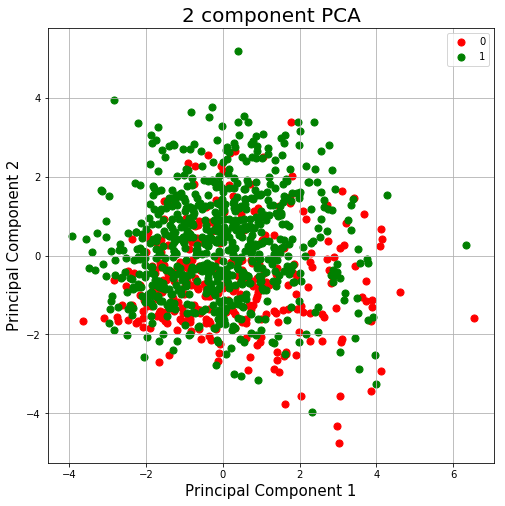

In [17]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Creditability'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()